<a href="https://colab.research.google.com/github/OrugboGodswill/OIBSIP/blob/main/Car_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
## Import all Dependency
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('car data.csv')

In [3]:
#drop missing value
df.isna().sum()
df.dropna(inplace=True)

In [4]:
duplicate_rows = df[df.duplicated(keep=False)]
duplicate_rows

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
15,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
51,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


In [5]:
duplicated_rows = df[df.duplicated(keep='first')]
duplicated_rows

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


In [6]:
df_cleaned = df.drop(duplicated_rows.index)

In [13]:
# Encode categorical variables
# change categorical columns type to integer using Scikit-Learn LableEncoder
# By Importing the Scikit Learn Package

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Fuel_Type'] = label_encoder.fit_transform(df['Fuel_Type'])
df['Transmission'] = label_encoder.fit_transform(df['Transmission'])
df['Selling_type'] = label_encoder.fit_transform(df['Selling_type'])
df['Car_Name'] = label_encoder.fit_transform(df['Car_Name'])


In [14]:
# Feature Selection
# The Important Features are 	Car_Name,	Year,	Present_Price,	Driven_kms,	Fuel_Type,	Transmission,	Owner.
# Y is the dependent variable
# X is the independent variable
## Preparing the data for Modelling

X = df.drop(['Car_Name','Selling_Price'],axis=1)
y = df['Selling_Price']

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Selection and Training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions on the testing set
y_prediction = model.predict(X_test)

In [15]:
## Evaluting the performance by Linear Regression Model
mse = mean_squared_error(y_test, y_prediction)
r2 = r2_score(y_test, y_prediction)
print("Mean Square Error is :", mse)
print("R-Squared score is :",r2)

Mean Square Error is : 3.5315798889713164
R-Squared score is : 0.8466902419662664


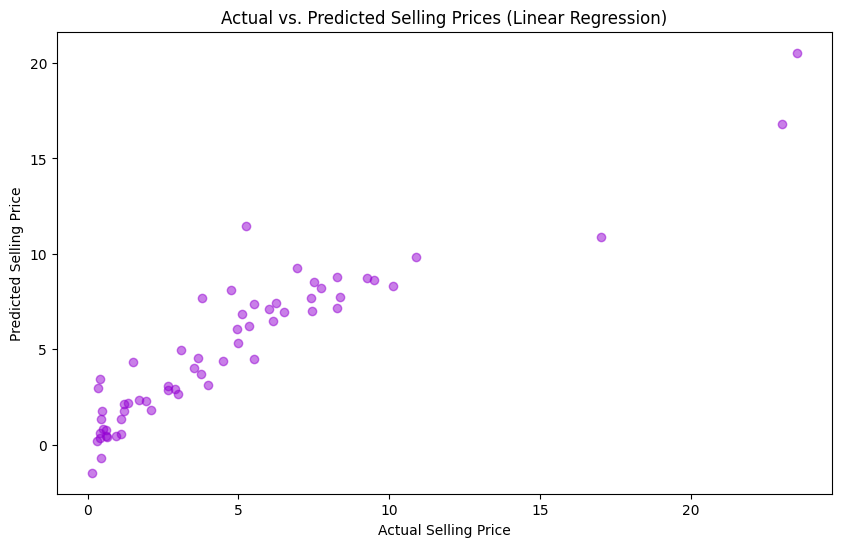

In [16]:
# Visualization of Actual Selling Prices & Predicted Selling Price
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_prediction, alpha=0.5, color='darkviolet')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs. Predicted Selling Prices (Linear Regression)')
plt.show()